<a href="https://colab.research.google.com/github/tufte28/MAT-494/blob/main/MAT494_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.2: Probability Distribution

Sample Spaces and Events:

Simple Coin Flip Recreation



In [ ]:
SampleSpace = {'heads','tails'}
prob_H = 1 / len(SampleSpace)
prob_T = 1 / len(SampleSpace)
print('Probability of flipping heads:', prob_H)
print('Probability of flipping tails:', prob_T)

Creates the same output as the equation P(A) = (N(A))/N



2.2.2: Conditional Probability

Load in high school grades data

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/tufte28/MAT-494/main/hsb2.csv')
df.head(3)

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31


In [ ]:
import numpy as np
df['PassingS'] = np.where(df['science']>=60, 1, 0)
df['PassingM'] = np.where(df['math']>= 60, 1, 0)
df['count'] = 1
df = df[['PassingS','PassingM','count']]
df.head()

,PassingS,PassingM,count
0,0,0,1
1,1,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
pd.pivot_table(df, values='count', index=['PassingS'], columns=['PassingM'], aggfunc=np.size,fill_value=0)


PassingM,0,1
PassingS,,
0,130,23
1,21,26


Define PofA as probability of passing science and PofB as probability of passing math where passing is a grade of 60 or better

In [ ]:
PofA = (21+26)/(21+26+130+23)
print(PofA)

0.235


In [ ]:
PofB = (23+26)/(21+26+130+23)
print(PofB)

0.245


In [ ]:
PofAandB = 26/(21+26+130+23)
print(PofAandB)

0.13


Now, PofA_B is probability of a student passing science given they pass math.

In [ ]:
PofA_B = PofAandB/PofB
print(PofA_B)

0.5306122448979592


Thus, the probability of passing science if someone is passing math is 53.06%

2.2.3: Discrete Random Variables

Rolling two Dice Experiment

In [ ]:
import random
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
from numpy.compat.py3k import sixu
diceONE = [1,2,3,4,5,6]
diceTWO = [1,2,3,4,5,6]
two=three=four=five=six=seven=eight=nine=ten=eleven=twelve=0
for i in range(1000000):
  result = random.choice(diceONE) + random.choice(diceTWO)
  if result == 2:
    two+=1
  elif result == 3:
    three+=1
  elif result == 4:
    four+=1
  elif result == 5:
    five+=1
  elif result == 6:
    six+=1
  elif result == 7:
    seven+=1
  elif result == 8:
    eight+=1
  elif result == 9:
    nine+=1
  elif result == 10:
    ten+=1
  elif result == 11:
    eleven+=1
  elif result == 12:
    twelve+=1
Tally = [two,three,four,five,six,seven,eight,nine,ten,eleven,twelve]
print(Tally)

[27708, 55682, 84077, 110973, 139611, 166756, 138032, 110643, 83118, 55715, 27685]


Now, plot the PMF

In [ ]:
Prob = []
for i in range(11):
  a = Tally[i]/1000000
  Prob.append(a)
print(Prob)

[0.027708, 0.055682, 0.084077, 0.110973, 0.139611, 0.166756, 0.138032, 0.110643, 0.083118, 0.055715, 0.027685]


<BarContainer object of 11 artists>

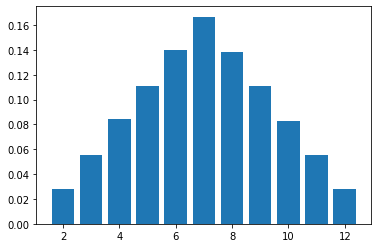

In [ ]:
xaxis = [2,3,4,5,6,7,8,9,10,11,12]
plt.bar(xaxis,Prob)

Now, back to coin flip for Bernoulli random variable

In [ ]:
from scipy.stats import bernoulli
import seaborn as sns
p = .5
X = bernoulli(p)
X_samples = X.rvs(1000)
sns.histplot(X_samples, stat = "frequency", discrete=True, shrink=.2)

Continuous Random Variabel/ Expected Value and Variance

In [ ]:
import numpy as np
N = 100_000
X = np.sqrt(np.random.uniform(size=N))

print('Expected Value:', np.mean(X))
print('Variance:', np.var(X))


Expected Value: 0.6654167098016315
Variance: 0.05529780371539191


2.2.4.2: The Normal Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequencey'), Text(0.5, 0, 'Normal Distribution')]

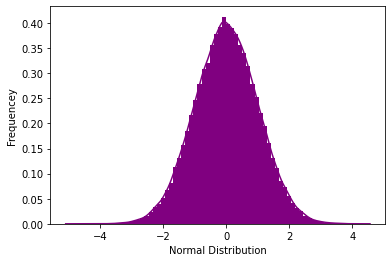

In [ ]:
from scipy.stats import norm
data_normal = norm.rvs(size=100000,loc=0,scale=1)

ax = sns.distplot(data_normal,bins=70,kde=True,color='purple',hist_kws={"linewidth": 20,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequencey')